In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [4]:
Product_id=test.Product_id

In [5]:
# print(train.shape)
# train.head()
test.head()
# test.shape

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [6]:
# train.isna().sum()
test.isna().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [63]:
# sns.scatterplot(x=train.index,y=train['Selling_Price']);
# train=train[train.Selling_Price>0]
train.loc[train.Selling_Price<0,'Selling_Price']=train.loc[train.Selling_Price<0,'Selling_Price']*(-1)

In [64]:
# train.Customer_name.nunique()
# test.Customer_name.nunique()
train.drop('Customer_name',axis=1,inplace=True)
test.drop('Customer_name',axis=1,inplace=True)

In [65]:
# train.head()
# train.Stall_no.nunique()
# train.Stall_no.value_counts()
# test.Stall_no.nunique()
# test.Stall_no.value_counts()
# train.drop(train[train.Stall_no.isna()].index,inplace=True)

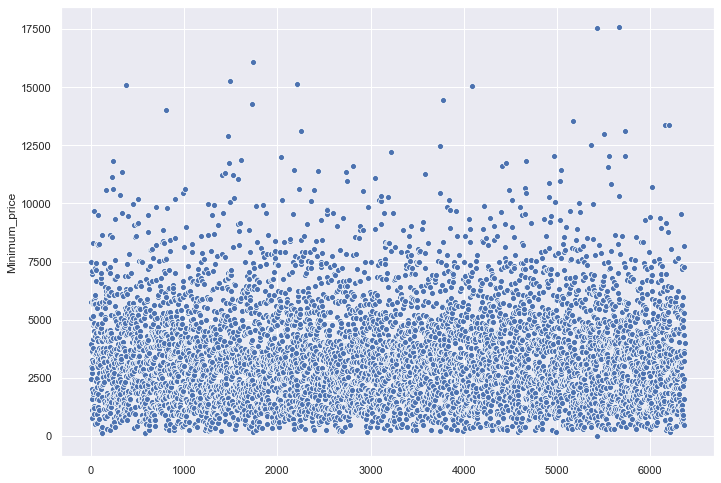

In [66]:
# sum(train.Minimum_price>12500)
sns.scatterplot(x=train.index,y=train['Minimum_price']);
# sns.scatterplot(x=test.index,y=test['Minimum_price']);

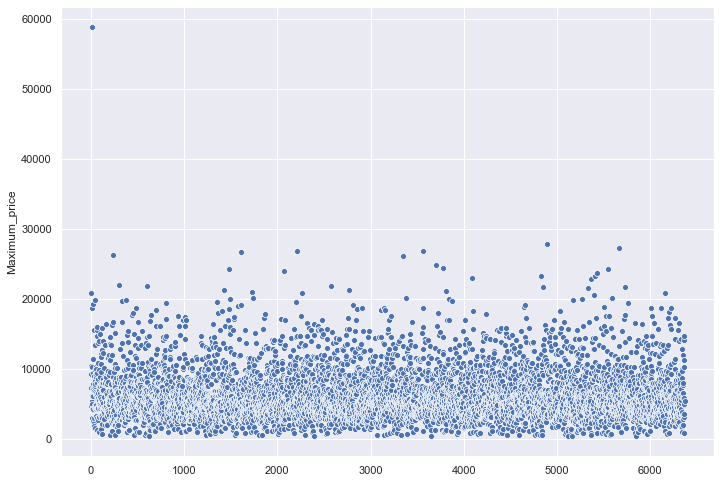

In [67]:
sns.scatterplot(x=train.index,y=train['Maximum_price']);
# sns.scatterplot(x=test.index,y=test['Maximum_price']);

In [68]:
train=train[train["Maximum_price"]<=33000]
train=train[train["Minimum_price"]<=22000]
# sns.scatterplot(x=train.index,y=train['Maximum_price']);

In [69]:
# train.isna().sum()
# train.Discount_avail.value_counts()
train=train[((train["Selling_Price"]<train["Minimum_price"]) & (train["Discount_avail"]==1.0)) |
            ((train["Selling_Price"]>train["Minimum_price"]) & (train["Discount_avail"]==0.0))]

2178.418556834154
2.3682901758808734
1.2127445280059377


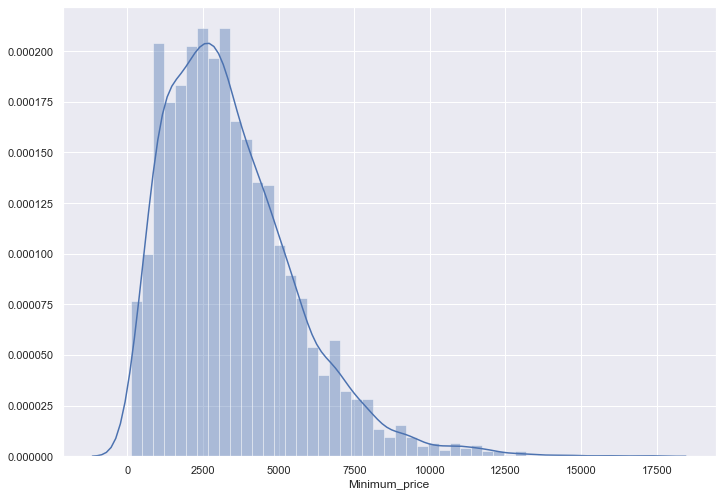

In [70]:
# sns.distplot(train['Minimum_price']);
# print(train['Minimum_price'].std())
# print(train['Minimum_price'].kurtosis())
# print(train['Minimum_price'].skew())

sns.distplot(test['Minimum_price']);
print(test['Minimum_price'].std())
print(test['Minimum_price'].kurtosis())
print(test['Minimum_price'].skew())

3660.6894649465166
2.9731850498304655
1.4036864094555896


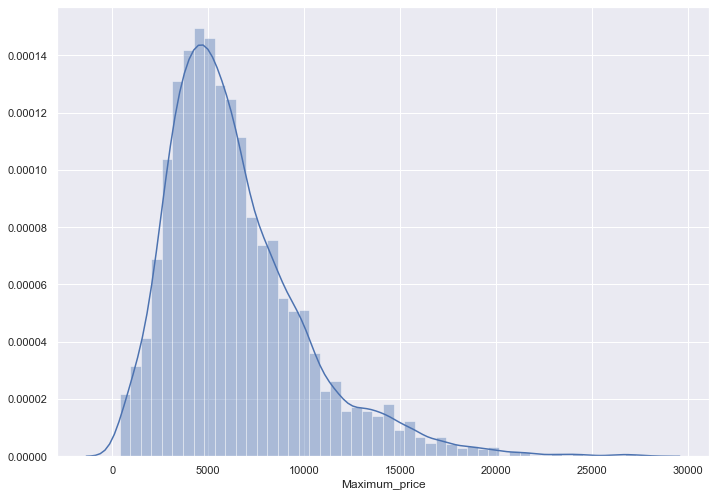

In [71]:
sns.distplot(train['Maximum_price']);
print(train['Maximum_price'].std())
print(train['Maximum_price'].kurtosis())
print(train['Maximum_price'].skew())

# sns.distplot(test['Maximum_price']);
# print(test['Maximum_price'].std())
# print(test['Maximum_price'].kurtosis())
# print(test['Maximum_price'].skew())

In [72]:
train.drop(train[(train.Minimum_price.isna()) & (train.Maximum_price.isna())].index,inplace=True)
test['Selling_Price']=-100
data=pd.concat((train,test)).reset_index(drop=True)

In [73]:
# sns.distplot(test.Maximum_price-test.Minimum_price);
# sns.distplot(train.Maximum_price-train.Minimum_price);
# sns.distplot(data.Maximum_price-data.Minimum_price);
a=data["Minimum_price"].median()
b=data["Maximum_price"].median()
c=b-a

In [74]:
data["Minimum_price"]=data["Minimum_price"].fillna(data["Maximum_price"]-c)
data["Maximum_price"]=data["Maximum_price"].fillna(data["Minimum_price"]+c)

-0.13755305108693985


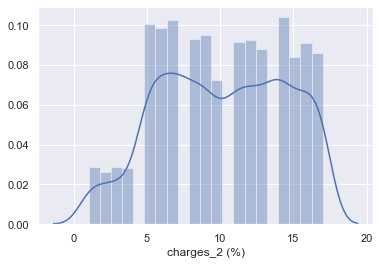

In [28]:
# train['charges_2 (%)'].value_counts()
sns.distplot(train['charges_2 (%)']);
print(train['charges_2 (%)'].skew())

In [75]:
# train.isna().sum()
# # train['charges_1'].value_counts()
# sns.distplot(train['charges_2 (%)']);
# print(train['charges_2 (%)'].skew())

In [76]:
# train['charges_1'].value_counts()
# sns.distplot(train['charges_1']);
# sns.scatterplot(train.index,train.charges_1);
# sum(train.charges_1>400)

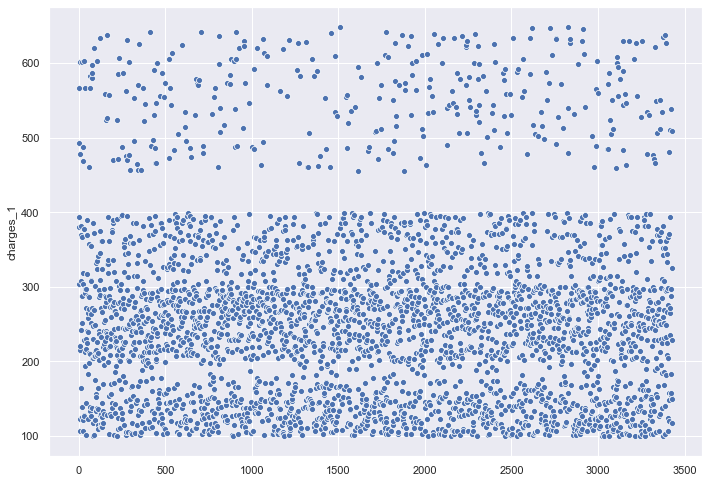

In [77]:
# train['charges_1'].value_counts()
# sns.distplot(train['charges_1']);
sns.scatterplot(test.index,test.charges_1);
# sum(test.charges_1>400)

In [78]:
# test.charges_1.mean()
# test.charges_1.median()
test.charges_1.fillna(255.0,inplace=True)
data["charges_1"]=data["charges_1"].fillna(data["charges_1"].mean())

In [79]:
# train.head()
# train.shape

In [80]:
# data.Product_id=data.Product_id.apply(lambda x:x[:4])
data.drop('Product_id',axis=1,inplace=True)

In [81]:
data.instock_date=pd.to_datetime(data.instock_date)
data['year']=data.instock_date.dt.year
data['month']=data.instock_date.dt.month
data['weekday']=data.instock_date.dt.dayofweek
data['time']=data.instock_date.dt.hour
data.drop('instock_date',axis=1,inplace=True)

In [82]:
# train.corr()

In [83]:
# for cat in train.columns:
#     print(train[cat].value_counts())

In [91]:
cat_col=[col for col in data.columns if col not in ['Maximum_price','Minimum_price','Selling_Price','charges_1']]

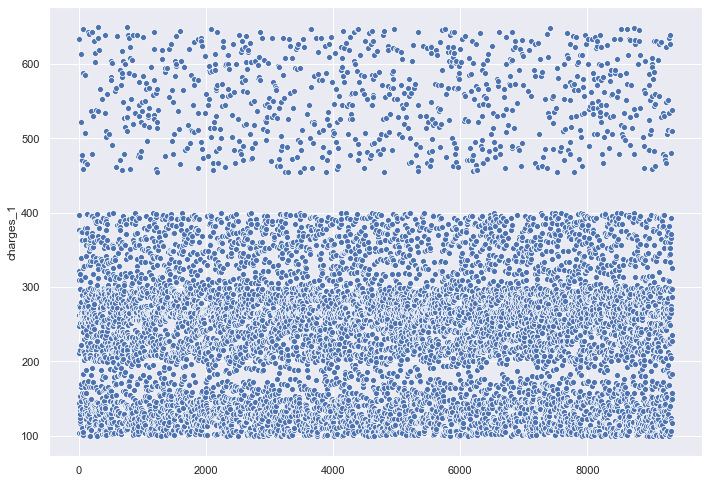

In [84]:
# data.head()
sns.scatterplot(data.index,data.charges_1);

In [584]:
# data['chrg_cat']=data.charges_1>420
# data['chrg_cat']=data.chrg_cat.map({True:1,False:0})

In [92]:
from sklearn.preprocessing import LabelEncoder
for feat in cat_col:
    lbl_enc = LabelEncoder()
    temp_col = data[feat].fillna("NONE").astype(str).values
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)
train2= data[data.Selling_Price != -100].reset_index(drop=True)
test2 = data[data.Selling_Price == -100].reset_index(drop=True)

In [95]:
x_train=train2.drop('Selling_Price',axis=1)
y_train=train2['Selling_Price']
x_test=test2.drop('Selling_Price',axis=1)

In [94]:
from xgboost import XGBRegressor
xbr=XGBRegressor(max_depth=11,n_estimators=155)
xbr.fit(x_train,y_train)

[14:19:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=11, min_child_weight=1, missing=None, n_estimators=155,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [96]:
prediction=xbr.predict(x_test)
submission=pd.Series(data=prediction,index=Product_id,name='Selling_Price')

In [97]:
submission[submission<0]=submission[submission<0]*(-1)
submission.to_csv('basic.csv')

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=150,max_depth=7)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [99]:
prediction=gbr.predict(x_test)
submission=pd.Series(data=prediction,index=Product_id,name='Selling_Price')

In [100]:
submission[submission<0]=submission[submission<0]*(-1)
submission.to_csv('../prediction/basic1.csv')